In [147]:
import numpy as np
from scipy import sparse as sparse
from scipy.constants import e, hbar, m_e, pi, epsilon_0
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

In [148]:
joul_to_eV = e
N = 2000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)

In [149]:
def potential_term(r: np.array) -> np.array:
    return sparse.diags((e ** 2 / (4.0 * pi * epsilon_0) / r))

In [150]:
def angular_term(r: np.array) -> np.array:
    return sparse.diags(l * (l + 1) / r ** 2)

In [151]:
def laplace_three_point(r: np.array) -> np.array:
    h = r[1] - r[0]
    ones = np.ones(N)
    main_diag = -2.0 / h ** 2 * ones
    off_diag = 1.0 / h ** 2 * ones[:-1]
    return sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))

In [152]:
def build_hamiltonian(r: np.array) -> np.array:
    laplace = laplace_three_point(r)
    angular = angular_term(r)
    potential = potential_term(r)

    return -hbar ** 2 / (2.0 * m_e) * (laplace - angular) - potential

In [153]:
hamiltonian = build_hamiltonian(r)

In [154]:
n_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=n_eigenvalues, which='SM')

eigenvectors = np.c_[eigenvalues, eigenvectors.T]
eigenvectors = eigenvectors[eigenvectors[:, 0].argsort()][:, 1:]
eigenvalues.sort()

densities = eigenvectors ** 2

c:\Users\Yanir Harel\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


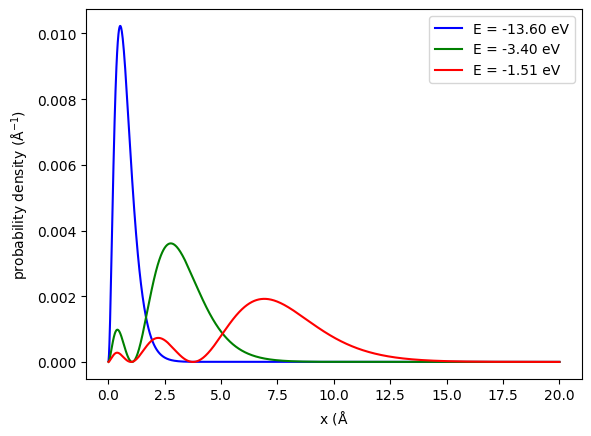

In [155]:
plt.xlabel('x ($\\mathrm{\AA}$')
plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')

energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
plt.plot(r * 1e10, densities[0], color='blue', label=energies[0])
plt.plot(r * 1e10, densities[1], color='green', label=energies[1])
plt.plot(r * 1e10, densities[2], color='red', label=energies[2])

plt.legend()
plt.show()